In [1]:
import math
import numpy as np
from statistics import mean
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [2]:
df=sc.textFile('s3://geocluster/DBPedia.csv')


In [3]:
df=df.map(lambda x:x.split(',')).cache()

In [4]:
latlongdf=df.map(lambda x:(int(x[0]),float(x[1]),float(x[2])))

In [5]:
def Great_circle(lat1,lon1,lat2,lon2):
    radius = 6371;

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c
    return d

def Euclidean(lat1,lat2, lon1,lon2):
    d_length = 110.25
    x= lat2 - lat1
    y= (lon2 - lon1)*math.cos(math.radians(lat1))
    return d_length*math.sqrt(x*x + y*y)

def Centroid(old,new):
    return [math.sqrt((old[i][0]-new[i][0])**2+(old[i][1]-new[i][1])**2) for i in range(0,k)]

def Equality(old,new):
    for i in range(0,k):
        if(old[i][0]!=new[i][0] or old[i][1]!=new[i][1]):
            return False;
    return True;




In [29]:
k=2
distance="euclidean"
iterations=50
convergedistance=0.01
ic=latlongdf.map(lambda x:(x[1],x[2])).takeSample(False, k);
output=[];
output.extend(ic);

for i in range(0,iterations):
    if(distance=="euclidean"):
        rddce=latlongdf.map(lambda x:(x[0],x[1],x[2],[Euclidean(x[1],x[2],ic[z][0],ic[z][1]) for z in range(0,k)],np.argmin([Euclidean(x[1],x[2],ic[j][0],ic[j][1]) for j in range(k)])))
        rdddist=latlongdf.map(lambda x:(np.argmin([Euclidean(x[1],x[2],ic[j][0],ic[j][1]) for j in range(0,k)]),(x[1],x[2])))
    elif(distance=="Great_circle"):
        rddce=latlongdf.map(lambda x:(x[0],x[1],x[2],[Great_circle(x[1],x[2],ic[z][0],ic[z][1]) for z in range(0,k)],np.argmin([Great_circle(x[1],x[2],ic[j][0],ic[j][1]) for j in range(k)])))
        rdddist=latlongdf.map(lambda x:(np.argmin([Great_circle(x[1],x[2],ic[j][0],ic[j][1]) for j in range(0,k)]),(x[1],x[2])))
    rddist=rdddist.groupByKey().map(lambda x:(mean([k[0] for k in x[1]]),mean([k[1] for k in x[1]]))) 
    old=ic;
    new=rddist.collect();
    if(len(new)<k):
        diff=(k-len(new));
        exclus=latlongdf.map(lambda x:(x[1],x[2])).takeSample(False,diff);
        new.extend(exclus)
    dist=sum(Centroid(old,new))
    if(dist<=convergedistance or Equality(old,new)):
        print(dist)
        break;
    else:
        ic=new;
        output.extend(ic)
        print(ic)
        
        

[(38.687210883463855, -4.192833075221616), (25.989722222222223, 83.61277777777778)]


[(38.687210883463855, -4.192833075221616), (35.586, 23.477)]


[(38.687210883463855, -4.192833075221616), (46.84788888888889, 8.549888888888889)]


[(38.687210883463855, -4.192833075221616), (39.24138888888889, -75.92166666666667)]


[(38.687210883463855, -4.192833075221616), (43.2092, 6.4661)]


[(38.687210883463855, -4.192833075221616), (37.56361111111111, 45.19083333333333)]


[(38.687210883463855, -4.192833075221616), (57.675, -1.933)]


[(38.687210883463855, -4.192833075221616), (35.53888888888889, -82.76194444444444)]


[(38.687210883463855, -4.192833075221616), (33.83222222222222, 57.30722222222222)]


[(38.687210883463855, -4.192833075221616), (56.82258, -5.12701)]


[(38.687210883463855, -4.192833075221616), (39.2, 48.35)]


[(38.687210883463855, -4.192833075221616), (40.19305555555555, -76.76333333333334)]


[(38.687210883463855, -4.192833075221616), (52.55, 20.516666666666666)]


[(38.687210883463855, -4.192833075221616), (53.7585, -2.6962)]


[(38.687210883463855, -4.192833075221616), (46.346805555555555, 15.229072222222221)]


[(38.687210883463855, -4.192833075221616), (49.98027777777778, -93.74222222222222)]


[(38.687210883463855, -4.192833075221616), (34.165277777777774, 47.355555555555554)]


[(38.687210883463855, -4.192833075221616), (30.640555555555554, 54.90777777777778)]


[(38.687210883463855, -4.192833075221616), (49.1308, 1.0442)]


[(38.687210883463855, -4.192833075221616), (40.42888888888889, -74.86777777777777)]


[(38.687210883463855, -4.192833075221616), (51.06693, -1.609966)]


[(38.687210883463855, -4.192833075221616), (50.95, 4.55)]


[(38.687210883463855, -4.192833075221616), (32.041, 115.801)]


[(38.687210883463855, -4.192833075221616), (47.3025, 5.5706)]


[(38.687210883463855, -4.192833075221616), (27.316666666666666, -81.8)]


[(38.687210883463855, -4.192833075221616), (52.1, 23.566666666666666)]


[(38.687210883463855, -4.192833075221616), (42.01555555555556, -74.41222222222223)]


[(38.687210883463855, -4.192833075221616), (45.2002, 5.7222)]


[(38.687210883463855, -4.192833075221616), (40.68138888888889, 44.16888888888889)]


[(38.687210883463855, -4.192833075221616), (42.09916666666667, -91.71694444444445)]


[(38.687210883463855, -4.192833075221616), (40.955555555555556, -88.48166666666667)]


[(38.687210883463855, -4.192833075221616), (39.92166666666667, 46.661944444444444)]


[(38.687210883463855, -4.192833075221616), (42.577777777777776, -117.88555555555556)]


[(38.687210883463855, -4.192833075221616), (26.54, 89.54)]


[(38.687210883463855, -4.192833075221616), (38.80083333333333, -80.49638888888889)]


[(38.687210883463855, -4.192833075221616), (-38.95, -68.23333333333333)]


[(38.687210883463855, -4.192833075221616), (51.4, 19.616666666666667)]


[(38.687210883463855, -4.192833075221616), (46.02444444444444, -90.105)]


[(38.687210883463855, -4.192833075221616), (25.77861111111111, 60.79555555555555)]


[(38.687210883463855, -4.192833075221616), (48.65888888888889, 8.940277777777778)]


[(38.687210883463855, -4.192833075221616), (50.17805555555555, 22.610555555555557)]


[(38.687210883463855, -4.192833075221616), (40.91972222222222, -74.14611111111111)]


[(38.687210883463855, -4.192833075221616), (26.36611111111111, 57.596666666666664)]


[(38.687210883463855, -4.192833075221616), (46.217, 20.483)]


[(38.687210883463855, -4.192833075221616), (34.8161, -85.4892)]


[(38.687210883463855, -4.192833075221616), (33.70166666666667, 47.459722222222226)]


[(38.687210883463855, -4.192833075221616), (42.486111111111114, -91.45722222222223)]


[(38.687210883463855, -4.192833075221616), (48.266666666666666, 9.7825)]


[(38.687210883463855, -4.192833075221616), (46.618611111111115, -118.31777777777778)]


[(38.687210883463855, -4.192833075221616), (31.647777777777776, -90.185)]


In [30]:
pd.DataFrame(output).to_csv('s3://geocluster/DBE2.csv')

In [31]:
df2=rdddist.map(lambda x:(float(x[0]),x[1][0],x[1][1])).toDF().toPandas()
df2.columns=['index','latitude','longitude']

df3=pd.DataFrame(ic,columns=['latitude','longitude'])

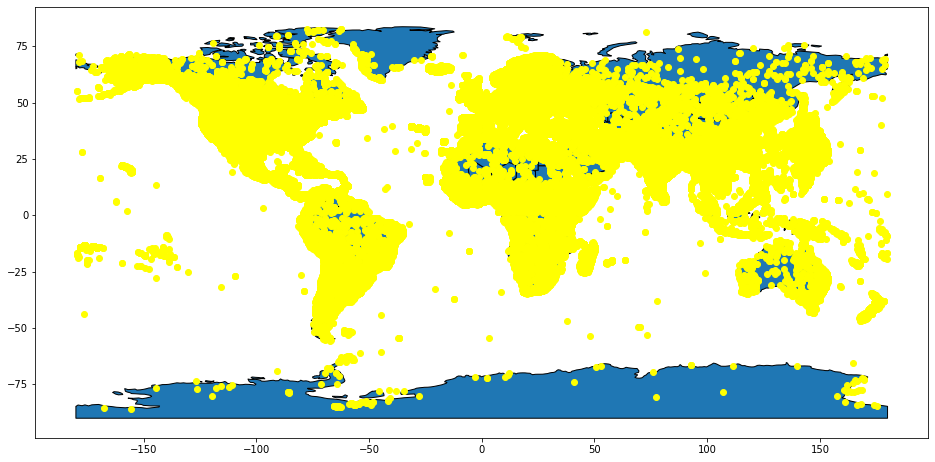

In [27]:
gdf = geopandas.GeoDataFrame(
    df2, geometry=geopandas.points_from_xy(df2.longitude, df2.latitude,df2.index))


world_map = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# restricted to South America.
ax = world_map.plot(
    edgecolor='black',figsize=(16,16))

# PLOTING
gdf.plot(ax=ax,color='yellow')

plt.show()

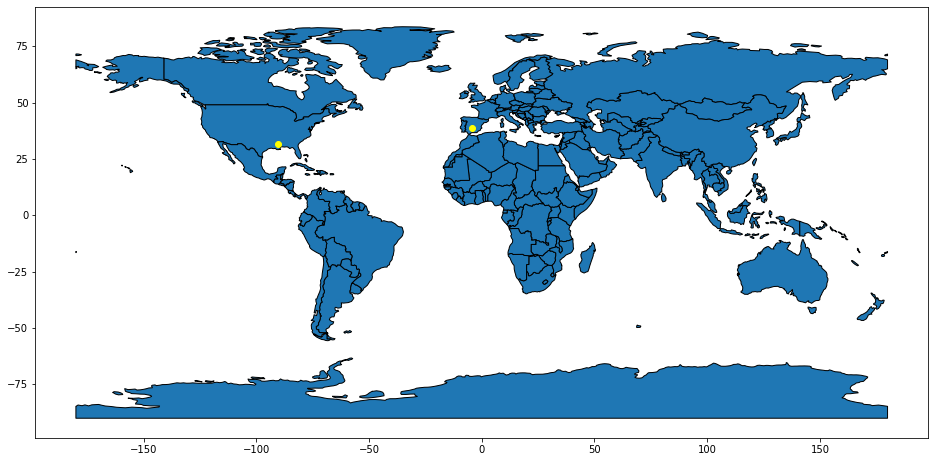

In [32]:
gdf = geopandas.GeoDataFrame(
    df3, geometry=geopandas.points_from_xy(df3.longitude, df3.latitude))


world_map = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# restricted to South America.
ax = world_map.plot(
    edgecolor='black',figsize=(16,16))

# PLOTTING.
gdf.plot(ax=ax,color='yellow')

plt.show()